<a href="https://colab.research.google.com/github/raghavujjwal/Quant_Recruitment/blob/main/Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
#We are importing the various libraries for our linear regression model.
import random
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.formula.api as smf
import scipy.stats as stats



In [2]:
#Here we are generating 100 random values between 0 and 15 for our x variable.
X_values = sorted(set([random.uniform(0, 15) for _ in range(100)]))
X_values = list(set ([random.uniform(0, 15) for _ in range(100)]))
X_values = list(set([random.uniform(0, 15) for _ in range(110)]))[:100]
X_array = np.array(X_values)
print(X_array)

[ 0.90142786  1.36218685  0.24908981  3.65635452  4.39961389  5.84134965
  5.96520699  7.51425239  6.60337381  7.23647913  6.31576277 10.57336069
 11.79310195 11.16549547 13.18380253 12.14822404 11.46884367 10.6858819
 11.02727918 14.30368193 13.07232166  4.14295138 14.54799957  3.27388841
  4.47782145  4.66531874  5.52361105  7.91256204  7.42445853  8.83908464
  8.53421128 10.30639972 11.87920999 12.23542759 12.02971504 12.55284572
 13.55264213 13.44593555 13.34310998 14.78212212  2.34409197  3.20487771
  5.61889609  6.65678832  1.49756956  4.8360487   6.03852928  7.05874879
  7.94360357  1.59353408  8.12629991  8.04683963  2.53524534  9.3186808
  9.57161047  3.65072748 12.47896861 12.93452557 13.14757755  2.69830146
  2.00109164  3.12870461  4.36736896  4.1829691   7.0687776   0.72503486
  0.3528366   0.75926365  0.42280176  0.61184343  0.81170401  4.82673024
  5.92498389  5.09480978  5.53744547  0.43549158  0.9671419   7.26323299
  8.91664941  8.01056709  8.85667656  8.01412847  9.6

In [3]:
#We are calculating the gaussian noise for the linear regression model on the basis of standard deviation and mean mentioned in the documentation.
noise_mean = 0
noise_std = 0.5
noise = np.random.normal(noise_mean, noise_std, size=X_array.shape)
print(noise)

[-0.04872602 -0.15279677 -0.18594888  0.10438349 -0.11098017  0.11006243
  0.37291183 -0.83300146 -0.89455756 -0.00647207  0.46100052  0.03504411
 -0.41681251 -0.62299775 -0.73579887 -0.61389906 -1.06170053  0.24539387
  0.1202094   0.42417885  0.27607185 -0.1345301   0.41136921 -0.33876299
  0.77139399  0.39962409 -1.14496914  0.6337275  -0.16355472  0.27997462
 -0.46178732 -0.64795199 -0.62141162  0.2643991   0.15939999  0.42139267
  0.06278029  0.77500652  0.3868739  -0.65661095 -0.84136897 -0.38361115
  0.06343766  0.19216731 -0.29078089  0.6715382   0.42208119  0.22518431
  0.08166482  0.53068993  0.69065304 -0.05936555  0.07100466  0.15262961
  0.2596507   0.62009475  0.48822367  0.70556439 -0.29111974  1.09059139
 -0.11321722  0.35285022  1.40298853  0.37207736  0.41201098  0.20569667
 -0.54978927  0.09237324  0.42650035  0.41638592 -0.29559377  0.03275218
 -0.24214426  0.28691618  0.60910278 -0.11773003 -0.6771457  -0.03379962
 -0.57320434 -0.96925424  0.65338928 -0.2143364   0

In [4]:
#Calculating the various Y values for the given x values and given beta1, beta0 and gaussian noise.
beta0_real = 2
beta1_real = 6
Y_values = beta0_real + beta1_real * X_array + noise
print(Y_values)

[ 7.35984113 10.02032435  3.30858998 24.0425106  28.28670314 37.15816031
 38.16415378 46.25251288 40.7256853  45.41240272 40.35557715 65.47520825
 72.3417992  68.36997508 80.36701634 74.27544517 69.75136147 66.36068529
 68.28388447 88.24627041 80.71000178 26.72317819 89.69936665 21.30456746
 29.63832267 30.39153654 33.99669714 50.10909975 46.38319648 55.31448249
 52.74348036 63.19044631 72.65384832 75.67696464 74.3376902  77.73846701
 83.37863307 83.45061983 82.4455338  90.03612177 15.22318282 20.84565511
 35.7768142  42.13289722 10.69463647 31.68783037 38.65325685 44.57767707
 49.74328626 12.09189442 51.44845251 50.22167223 17.28247669 58.0647144
 59.68931351 24.5244596  77.36203533 80.31271783 80.59434555 19.28040016
 13.89333261 21.12507788 29.6072023  27.46989196 44.82467659  6.55590585
  3.56723034  6.64795515  4.9633109   6.08744653  6.57463028 30.99313363
 37.30775909 32.85577489 35.83377563  4.49521947  7.12570568 45.54559831
 54.92669213 49.0941483  55.79344865 49.87043439 60.

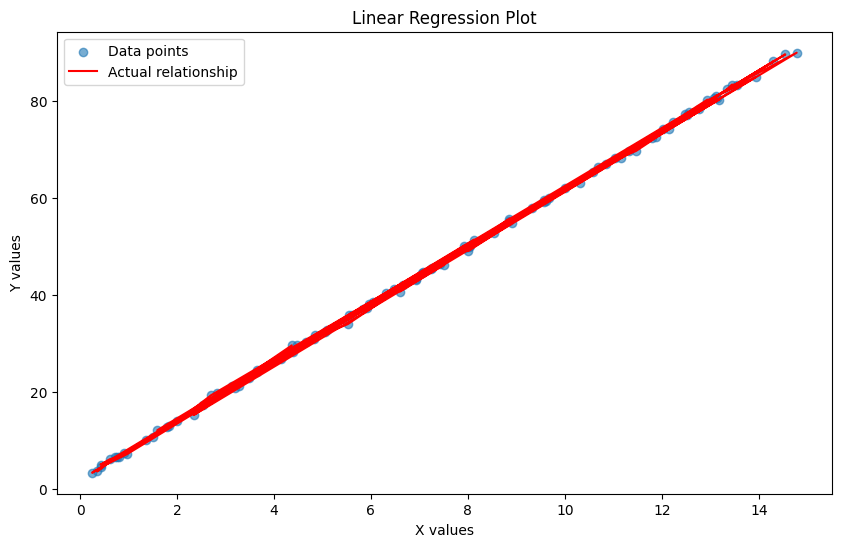

In [5]:
#Here, we are scattering the various data points on a graph and plotting the line of the equation on it.
plt.figure(figsize=(10, 6))
plt.scatter(X_array, Y_values, alpha=0.6, label='Data points')
plt.plot(X_array, Y_values, color='red', label='Actual relationship')
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('Linear Regression Plot')
plt.legend()
plt.show()

In [6]:
#Calculating the estimated values of beta0 and beta1 using least squares method using the polyfit function of numpy library.
beta1, beta0 = np.polyfit(X_values, Y_values, 1)
print(f"Estimated β1 (slope): {beta1:.4f}")
print(f"Estimated β0 (intercept): {beta0:.4f}")

Estimated β1 (slope): 5.9917
Estimated β0 (intercept): 2.0805


In [7]:
#Calculating the estimated Y values against the given values of the x variable and the estimated values of beta0 and beta1.
Y_calculated = beta0 + beta1 * X_array
print(Y_calculated)

[ 7.48159518 10.24234751  3.57294922 23.9884247  28.4418484  37.08036744
 37.82248958 47.10398107 41.64622509 45.43963337 39.92293189 65.43339067
 72.74177436 68.98131375 81.07450341 74.86957683 70.79890005 66.10758956
 68.1531564  87.78453983 80.40653795 26.90399105 89.24842988 21.69678371
 28.91044849 30.03388525 35.17655745 49.49055259 46.5659588  55.04204362
 53.21531889 63.83382748 73.25771212 75.39207863 74.1595006  77.29396847
 83.28449775 82.6451387  82.02903368 90.65123346 16.12567665 21.28328892
 35.74748153 41.96627142 11.05352673 31.05685631 38.26181833 44.37471776
 49.67654566 11.62852207 50.77121629 50.29511021 17.27101971 57.91566347
 59.43115462 23.95470888 76.85131533 79.58089839 80.85745238 18.2480111
 14.07050473 20.8268788  28.2486449  27.14376718 44.43480786  6.4246926
  4.19457398  6.62978292  4.61378765  5.74647795  6.94399238 31.00102247
 37.58148287 32.60728785 35.25944987  4.6898219   7.87533721 45.59993577
 55.50679225 50.07777425 55.14744997 50.09911312 60.0

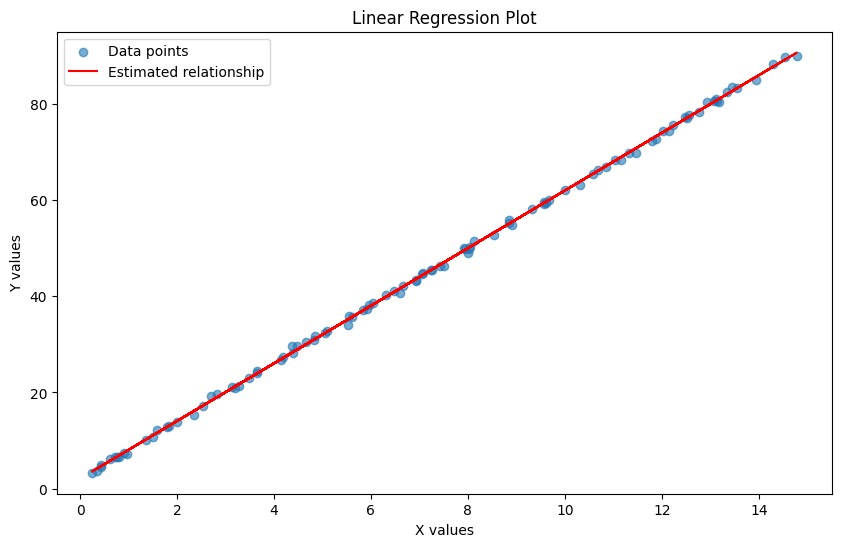

In [8]:
#Plotting the line for the estimated function against the actual data points.
plt.figure(figsize=(10, 6))
plt.scatter(X_values, Y_values, alpha=0.6, label='Data points')
plt.plot(X_values, Y_calculated, color='red', label='Estimated relationship')
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('Linear Regression Plot')
plt.legend()
plt.show()

In [10]:
#Calculating the residual of the estimated function.
def residuals(Y_values, Y_calculated):
  return Y_values - Y_calculated
res = residuals(Y_values, Y_calculated)
print("Residuals:", res)

Residuals: [-0.12175406 -0.22202316 -0.26435924  0.0540859  -0.15514526  0.07779287
  0.3416642  -0.85146819 -0.92053979 -0.02723065  0.43264526  0.04181758
 -0.39997516 -0.61133867 -0.70748708 -0.59413166 -1.04753858  0.25309573
  0.13072808  0.46173059  0.30346383 -0.18081286  0.45093677 -0.39221625
  0.72787419  0.35765129 -1.17986031  0.61854716 -0.18276232  0.27243887
 -0.47183853 -0.64338117 -0.6038638   0.28488601  0.17818959  0.44449854
  0.09413532  0.80548113  0.41650012 -0.61511169 -0.90249383 -0.4376338
  0.02933267  0.1666258  -0.35889026  0.63097406  0.39143852  0.20295931
  0.0667406   0.46337235  0.67723622 -0.07343798  0.01145698  0.14905093
  0.2581589   0.56975073  0.51072     0.73181944 -0.26310683  1.03238906
 -0.17717211  0.29819908  1.3585574   0.32612477  0.38986872  0.13121325
 -0.62734364  0.01817223  0.34952325  0.34096858 -0.3693621  -0.00788884
 -0.27372378  0.24848704  0.57432576 -0.19460243 -0.74963153 -0.05433746
 -0.58010012 -0.98362595  0.64599867 -0.2

In [11]:
#Calculating the Residual squared sum of the estimated function.
def rss(Y_values, Y_calculated):
  return np.sum((Y_values - Y_calculated) ** 2)
rss_value = rss(Y_values, Y_calculated)
print("RSS:", rss_value)

RSS: 22.544656268834114


In [19]:
#Calculating the standard errors of the estimated coefficients.
X = sm.add_constant(X_values)
model = sm.OLS(Y_values, X).fit()
standard_errors = model.bse
print("Standard Errors:", standard_errors)

Standard Errors: [0.09510459 0.01141837]


In [27]:
#Perform a hypothesis test to check if β1 is significantly different from 0 using a t-test assuming a significance level of 0.05.
beta1 = model.params[1]
std_err = model.bse[1]
t_stat = beta1 / std_err
df = model.df_resid
p_val = 2*stats.t.sf(abs(t_stat), model.df_resid)
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_val:.4f}")
alpha = 0.05
if p_val < alpha:
    print("Reject the null hypothesis: beta1 is significantly different from 0.")
else:
    print("Fail to reject the null hypothesis: beta1 is not significantly different from 0.")


t-statistic: 524.7465
p-value: 0.0000
Reject the null hypothesis: beta1 is significantly different from 0.


In [28]:
#Calculating the R2 value for checking the overall fit of the model.
R2 = model.rsquared
print(f"R-squared: {R2:.4f}")

R-squared: 0.9996
